# Practical work 3 : MLP, part 2

## 2-layers MLP learning 

Le modèle construit dans le [premier notebook](./Notebook_C4_1.ipynb) n'est pas adapté pour réaliser des boucles d'apprentissage.
Dans ce Notebook, on se propose de l'encapsuler dans une classe dotée des méthodes `forward` et `backward`.

Ecrire la classe `XORModel` permettant de réaliser un apprentissage comme suit:

```python
    xor_model = MLPModel()
    L = []
    lr = 0.01
    num_epochs = 1000
    for epoch in range(num_epochs = 1000):
        loss = xor_model.forward()
        L.append(loss)
        xor_model.backward()
        xor_model.optimizerSGD(lr)
        print(f"Epoch {epoch} - Loss: {loss}")
```

L'optimizer est de type SGD (Stochastic Gradient Descent): Les points sont modifiés après chaque passage d'un exemple.

Schéma du réseau à réaliser est le même que dans le précédent Notebook:

<img src="./MLP2-a.jpg" width="400" align="center"/>

## Solution

In [1]:
import op

class MLPModel:

    def __init__(self):
        # Inputs
        self.x1 = op.PlaceHolder(1.0)
        self.x2 = op.PlaceHolder(-1.0)

        # Desired outputs
        self.y2_1 = op.PlaceHolder(0)
        self.y2_2 = op.PlaceHolder(1.0)

        # Layer 1 - Neuron 1
        self.w1_11 = op.Parameter(-1)
        self.w1_12 = op.Parameter(2)
        self.mul1_11 = op.Mul()
        self.mul1_12 = op.Mul()
        self.add1_11 = op.Add()
        self.b1_1 = op.Parameter(4)
        self.add1_12 = op.Add()
        self.sigma1_1 = op.Tanh()

        # Layer 1 - Neuron 2
        self.w1_21 = op.Parameter(-1)
        self.w1_22 = op.Parameter(1)
        self.mul1_21 = op.Mul()
        self.mul1_22 = op.Mul()
        self.add1_21 = op.Add()
        self.b1_2 = op.Parameter(-1)
        self.add1_22 = op.Add()
        self.sigma1_2 = op.Tanh()

        # Layer 2 - Neuron 1
        self.w2_11 = op.Parameter(-1)
        self.w2_12 = op.Parameter(2)
        self.mul2_11 = op.Mul()
        self.mul2_12 = op.Mul()
        self.add2_11 = op.Add()
        self.b2_1 = op.Parameter(4)
        self.add2_12 = op.Add()
        self.sigma2_1 = op.Tanh()

        # Layer 2 - Neuron 2
        self.w2_21 = op.Parameter(-1)
        self.w2_22 = op.Parameter(1)
        self.mul2_21 = op.Mul()
        self.mul2_22 = op.Mul()
        self.add2_21 = op.Add()
        self.b2_2 = op.Parameter(-1)
        self.add2_22 = op.Add()
        self.sigma2_2 = op.Tanh()

        # Error / Loss
        self.err1 = op.Sub()
        self.err2 = op.Sub()
        self.mse1 = op.Square()
        self.mse2 = op.Square()
        self.mseT = op.Add()

    def forward(self):
        # Forward Layer 1 neuron 1
        e1_11 = self.mul1_11(self.x1(), self.w1_11())
        e1_12 = self.mul1_12(self.x2(), self.w1_12())
        v1_10 = self.add1_11(e1_11, e1_12)
        v1_1 = self.add1_12(v1_10, self.b1_1())
        y1_1 = self.sigma1_1(v1_1)

        # Forward Layer 1 neuron 2
        e1_21 = self.mul1_21(self.x1(), self.w1_21())
        e1_22 = self.mul1_22(self.x2(), self.w1_22())
        v1_20 = self.add1_21(e1_21, e1_22)
        v1_2 = self.add1_22(v1_20, self.b1_2())
        y1_2 = self.sigma1_2(v1_2)

        # Forward Layer 2 neuron 1
        e2_11 = self.mul2_11(y1_1, self.w2_11())
        e2_12 = self.mul2_12(y1_2, self.w2_12())
        v2_10 = self.add2_11(e2_11, e2_12)
        v2_1 = self.add2_12(v2_10, self.b2_1())
        ypred_1 = self.sigma2_1(v2_1)

        # Forward Layer 2 neuron 2
        e2_21 = self.mul2_21(y1_1, self.w2_21())
        e2_22 = self.mul2_22(y1_2, self.w2_22())
        v2_20 = self.add2_21(e2_21, e2_22)
        v2_2 = self.add2_22(v2_20, self.b2_2())
        ypred_2 = self.sigma2_2(v2_2)

        # Error
        error1 = self.err1(ypred_1, self.y2_1())
        error2 = self.err2(ypred_2, self.y2_2())
        mserror1 = self.mse1(error1)
        mserror2 = self.mse2(error2)
        return self.mseT(mserror1, mserror2)

    def backward(self):
        g_L = 1

        # Backward Layer 2 neuron 1
        g_mserror1 = self.mseT.grad1(g_L)
        g_error1 = self.mse1.grad(g_mserror1)
        g_ypred_1 = self.err1.grad1(g_error1)
        g_v2_1 = self.sigma2_1.grad(g_ypred_1)
        g_v2_10 = self.add2_12.grad1(g_v2_1)
        self.g_b2_1 = self.add2_12.grad2(g_v2_1)
        g_e2_11 = self.mul2_11.grad1(g_v2_10)
        self.g_w2_11 = self.mul2_11.grad2(g_v2_10)
        g_e2_12 = self.mul2_12.grad1(g_v2_10)
        self.g_w2_12 = self.mul2_12.grad2(g_v2_10)

        # Backward Layer 2 neuron 2
        g_mserror2 = self.mseT.grad2(g_L)
        g_error2 = self.mse2.grad(g_mserror2)
        g_ypred_2 = self.err2.grad1(g_error2)
        g_v2_2 = self.sigma2_2.grad(g_ypred_2)
        g_v2_20 = self.add2_22.grad1(g_v2_2)
        self.g_b2_2 = self.add2_22.grad2(g_v2_2)
        g_e2_21 = self.mul2_21.grad1(g_v2_20)
        self.g_w2_21 = self.mul2_21.grad2(g_v2_20)
        g_e2_22 = self.mul2_22.grad1(g_v2_20)
        self.g_w2_22 = self.mul2_22.grad2(g_v2_20)

        # Backward Layer 1 neuron 1
        g_v1_1 = self.sigma1_1.grad(g_e2_11 + g_e2_21)
        g_v1_10 = self.add1_12.grad1(g_v1_1)
        self.g_b1_1 = self.add1_12.grad2(g_v1_1)
        self.g_w1_11 = self.mul1_11.grad2(g_v1_10)
        self.g_w1_12 = self.mul1_12.grad2(g_v1_10)

        # Backward Layer 1 neuron 2
        g_v1_2 = self.sigma1_2.grad(g_e2_12 + g_e2_22)
        g_v1_20 = self.add1_22.grad1(g_v1_2)
        self.g_b1_2 = self.add1_22.grad2(g_v1_2)
        self.g_w1_21 = self.mul1_21.grad2(g_v1_20)
        self.g_w1_22 = self.mul1_22.grad2(g_v1_20)

    def optimizerSGD(self, lr):
        """Stochastic Gradient Descent"""
        self.w2_11.update(self.w2_11() - lr * self.g_w2_11)
        self.w2_12.update(self.w2_12() - lr * self.g_w2_12)
        self.b2_1.update(self.b2_1() - lr * self.g_b2_1)
        self.w2_21.update(self.w2_21() - lr * self.g_w2_21)
        self.w2_22.update(self.w2_22() - lr * self.g_w2_22)
        self.b2_2.update(self.b2_2() - lr * self.g_b2_2)
        self.w1_11.update(self.w1_11() - lr * self.g_w1_11)
        self.w1_12.update(self.w1_12() - lr * self.g_w1_12)
        self.b1_1.update(self.b1_1() - lr * self.g_b1_1)
        self.w1_21.update(self.w1_21() - lr * self.g_w1_21)
        self.w1_22.update(self.w1_22() - lr * self.g_w1_22)
        self.b1_2.update(self.b1_2() - lr * self.g_b1_2)

## Go !

In [2]:
xor_model = MLPModel()
L = []
lr = 0.01
num_epochs = 1000
for epoch in range(num_epochs):
    loss = xor_model.forward()
    L.append(loss)
    xor_model.backward()
    xor_model.optimizerSGD(lr)
    print(f"Epoch {epoch} - Loss: {loss}")

Operator -> PlaceHolder
Operator -> PlaceHolder
Operator -> PlaceHolder
Operator -> PlaceHolder
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Sub
Operator -> Sub
Operator -> Square
Operator -> Square
Operator -> Add
Epoch 0 - Loss: 4.686705513091586
Epoch 1 - Loss: 4.679783282987222
Epoch 2 - Loss: 4.672581653881472
Epoch 3 - Loss: 4.665087683152811
Epoch 4 - Loss: 4.6572880157943795
Epoch 5 - Loss: 4.649168924656944
Epoch 6 - Loss: 4.640716364614289
Epoch 7 - Loss: 4.631916043202434
Epoch 8 - Loss: 4.622753510592269
Epoch 9 - Loss: 4.613214272059152
Epoch 10 - Loss: 4.603283926394587
Epoch 11 - Loss: 4.592948333938928
Epoch 12 - Loss: 4.582193818066329
Epoch 13 - Loss: 4.571007403979579
Epoch 14 - Lo

## Display the Loss

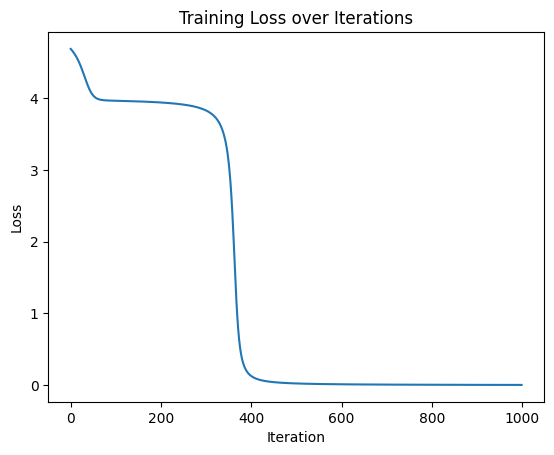

In [3]:
import matplotlib.pyplot as plt
plt.plot(L)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()